# Discrete Time Model Simulating Breast Cancer States

## Expected lifetime after surgery
Here we rejected the women who had eiter: 

1) Exceeded a lifetime of 12 months, but were still in state 1

2) Died (i.e. reached state 5) before exceeding a lifetime of 12 months 

The resulting lifetime distribution is plotted below with the mean.

In [13]:
# Initialization
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


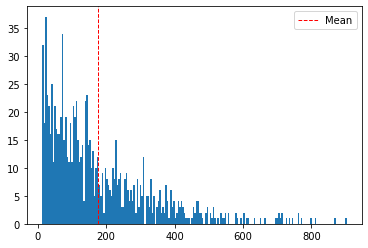

Mean of lifetime after surgery with reappearance:  177.184


In [17]:
P = np.array([[0.9915, 0.005, 0.0025, 0, 0.001],
              [0, 0.986, 0.005, 0.004, 0.005], 
              [0, 0, 0.992, 0.003, 0.005],
              [0, 0, 0, 0.991, 0.009],
              [0, 0, 0, 0, 1]])

max_state = 5
n_women = 1000
women_states = np.ones(n_women)
lifetime = np.zeros(n_women)
states = np.arange(1,max_state+1)

# Run until max_state is reached for all individuals
while np.min(women_states) < max_state:  # And len(women_who_meet_req) < 1000
    
    # Make temporary vector with women's states
    new_women_states = women_states
    
    # Update states
    for i in range(1, int(np.max(women_states)) + 1):
        index_state = np.where(women_states == i)[0]
        new_women_states[index_state] = np.random.choice(states, size = len(index_state), p = P[i-1,:])
    women_states = new_women_states
    
    # Update liftime
    index_lifetime = np.where(women_states < max_state)[0]
    lifetime[index_lifetime] += 1
    
    # Index which women must be rejected
    index_reject_died = np.where((women_states == max_state) & (lifetime <= 12))[0]
    index_reject_no_rep = np.where((lifetime > 12) & (women_states < 2))[0]
    
    # Reset these women
    index_reject = np.sort(np.concatenate([index_reject_died, index_reject_no_rep]))
    women_states[index_reject] = 1
    lifetime[index_reject] = 0
    
    # Debug
    #if len(index_reject) > 0:
    #    print("Rejection index: ", index_reject)
    #print("State:\t\t", women_states, )
    #print("Lifetime:\t",lifetime)
    
# Plot in histogram to see distribution, with mean
plt.figure()
plt.hist(lifetime, bins=200)
plt.axvline(np.mean(lifetime), color='red', linestyle='dashed', linewidth=1, label="Mean")
plt.legend()
plt.show()

# Print mean
print("Mean of lifetime after surgery with reappearance: ", np.mean(lifetime))

Here it can be seen, that the frequencies of lifetimes (above 12 months with reappearance within a year) looks more to be from an exponential distribution with the highest frequencies for the lowest lifetimes. This differs from the phase-type distribution of the general lifetimes seen in the first task, where the shortest lifetimes were not the most frequent. This difference makes sense, as one of the criteria for acceptance in this task is that the breast cancer must have reappeared within 12 months, meaning that we discard all the women who just stay in state 1. It seems reasonable that these state-1-women in many cases would live longer than women for which the cancer reappeared within a year as the latter will have a more progressed disease. By rejecting these women, we may lose this "block" of longer lifetimes. On the other hand, one could expect that we would have a decrease in the frequency of low lifetimes, as we also discard the women who die within 12 months. However, we don't see a remarkable "loss of short lifetimes", indicating that we originally didn't have that many women who died within these 12 months. 